In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets, transforms
from collections import defaultdict
from tensorboardX import SummaryWriter
from torchvision.utils import make_grid
import os
import sys
sys.path.append('../')
from hyperspherical_vae.distributions import VonMisesFisher
from hyperspherical_vae.distributions import HypersphericalUniform
import globalvar as gl

# 设置参数

In [2]:
seed = 1
use_cuda = torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda:0" if use_cuda else "cpu")
log_interval = 100
batch_size=64
n_cpu=8
h_dim=128
latent_dim=11
img_size=28
lr=1e-3
distribution='vmf'
# distribution='normal'
C_VAE=False
if C_VAE==False:
    log_dir=os.path.join(os.path.abspath('.'),'log{}d'.format(latent_dim))
else:
    log_dir=os.path.join(os.path.abspath('.'),'log{}d_CVAE'.format(latent_dim))

gl._init()
gl.set_value('use_cuda',use_cuda)
gl.set_value('device',device)
gl.set_value('log_interval',log_interval)
gl.set_value('log_dir',log_dir)
gl.set_value('batch_size',batch_size)
gl.set_value('n_cpu',n_cpu)
gl.set_value('h_dim',h_dim)
gl.set_value('latent_dim',latent_dim)
gl.set_value('img_size',img_size)
gl.set_value('lr',lr)
gl.set_value('distribution',distribution)
gl.set_value('C_VAE',C_VAE)

In [3]:
import imp
import base
imp.reload(base)
model=base.VAE()

In [4]:
s_epoch=0
e_epoch=5

In [ ]:
model.train(s_epoch=s_epoch,e_epoch=e_epoch,lossKL=True)
model.save(log_dir,e_epoch=e_epoch)

In [12]:
model.load(log_dir,e_epoch=e_epoch)
model.generate_hidden(log_dir)

data has been saved successfully


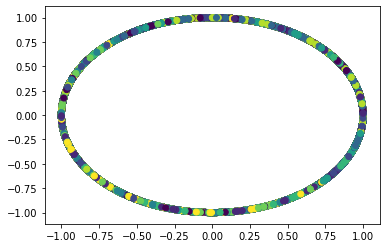

In [13]:
model.plot()

In [7]:
e_epoch=100
model.load(log_dir,e_epoch=e_epoch)
model.pred(3,weights='distance',plot=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gao\\Desktop\\code\\sVAE\\examples\\log10d\\sVAE/10d_encoder_100epoch.pkl'